In [2]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats import pearsonr

In [3]:
df=pd.read_csv("E:\MS Datascience\Tool and techniques for data science\MSDS25026_Project\Viral_Social_Media_Trends.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\UMAR\AppData\Local\Temp\ipykernel_16472\2197543727.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("E:\MS Datascience\Tool and techniques for data science\MSDS25026_Project\Viral_Social_Media_Trends.csv")


Dataset structure

In [4]:
# Dataset structure
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [5]:
df.tail()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low
4999,Post_5000,Instagram,#Fashion,Reel,Japan,2224007,72744,29945,46381,Low


In [6]:
df.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

Exploratory Data Analysis

Check dataset dimensions

In [7]:
print(" Dataset shapes",df.shape)
print(f"The dataset contains {df.shape[0]:,} samples and {df.shape[1]} variables.\n")

 Dataset shapes (5000, 10)
The dataset contains 5,000 samples and 10 variables.



Data types of all columns

In [8]:
print("\nData types:")
print(df.dtypes)


Data types:
Post_ID             object
Platform            object
Hashtag             object
Content_Type        object
Region              object
Views                int64
Likes                int64
Shares               int64
Comments             int64
Engagement_Level    object
dtype: object


Dataset Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


DATA SUMMARY

In [10]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


Target variable distribution

In [11]:
print("\nTarget variable counts:")
print(df['Engagement_Level'].value_counts())
print("\nTarget variable percentage distribution:")
print(df['Engagement_Level'].value_counts(normalize=True) * 100)


Target variable counts:
Engagement_Level
Low       1729
High      1673
Medium    1598
Name: count, dtype: int64

Target variable percentage distribution:
Engagement_Level
Low       34.58
High      33.46
Medium    31.96
Name: proportion, dtype: float64


Class Distribution Plot

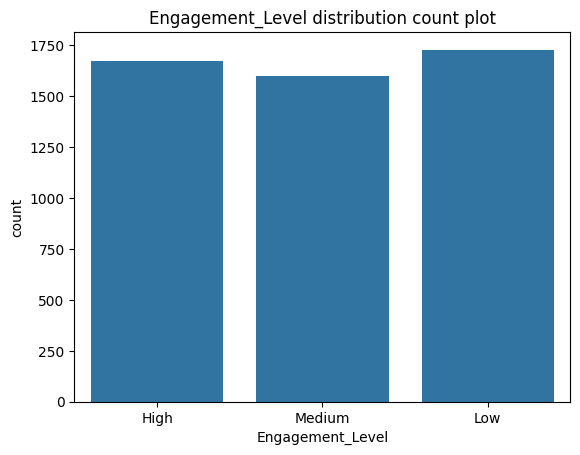

In [12]:
sns.countplot(x='Engagement_Level',data=df)
plt.title("Engagement_Level distribution count plot")
plt.show()

Data Wrangling / Cleansing

Handling Missing Values

In [13]:
df.isnull().sum()          # Count missing values per column
(df.isnull().sum()/len(df))*100   # % of missing values

Post_ID             0.0
Platform            0.0
Hashtag             0.0
Content_Type        0.0
Region              0.0
Views               0.0
Likes               0.0
Shares              0.0
Comments            0.0
Engagement_Level    0.0
dtype: float64

Ploting Missing Values

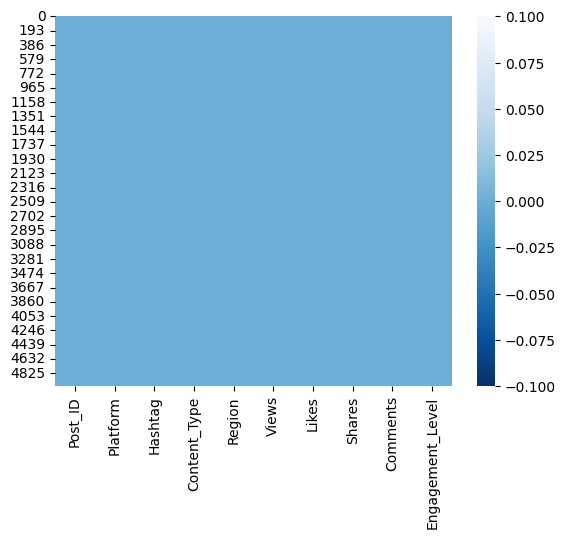

In [14]:
sns.heatmap(df.isna(),cmap='Blues_r')
plt.show()

Remove Duplicates

In [15]:
# Count duplicate rows
num_duplicates = df.duplicated().sum()

# Print in a readable format
print(f"Number of duplicate rows in the dataset: {num_duplicates}")

Number of duplicate rows in the dataset: 0


Fix Inconsistent Categories

In [16]:
categorical_cols = ['Platform', 'Content_Type', 'Region', 'Hashtag']

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")



Unique values in Platform:
['TikTok' 'Instagram' 'Twitter' 'YouTube']


Unique values in Content_Type:
['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']


Unique values in Region:
['UK' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'USA']


Unique values in Hashtag:
['#Challenge' '#Education' '#Dance' '#Comedy' '#Gaming' '#Music' '#Viral'
 '#Fitness' '#Tech' '#Fashion']




Standardize Capitalization

In [17]:
# Fix inconsistent categories
df['Platform'] = df['Platform'].str.strip().str.capitalize()
df['Content_Type'] = df['Content_Type'].str.strip().str.title()
df['Region'] = df['Region'].str.strip().str.title()
df['Hashtag'] = df['Hashtag'].str.strip().str.lower()  # hashtags usually lowercase

print("=== Unique Values AFTER Cleaning ===")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
print("\n")

=== Unique Values AFTER Cleaning ===
Platform: ['Tiktok' 'Instagram' 'Twitter' 'Youtube']
Content_Type: ['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']
Region: ['Uk' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'Usa']
Hashtag: ['#challenge' '#education' '#dance' '#comedy' '#gaming' '#music' '#viral'
 '#fitness' '#tech' '#fashion']




Verify Fix

In [18]:
for col in categorical_cols:
    print(f"Updated unique values in {col}:")
    print(df[col].unique())
    print("\n")

Updated unique values in Platform:
['Tiktok' 'Instagram' 'Twitter' 'Youtube']


Updated unique values in Content_Type:
['Video' 'Shorts' 'Post' 'Tweet' 'Live Stream' 'Reel']


Updated unique values in Region:
['Uk' 'India' 'Brazil' 'Australia' 'Japan' 'Germany' 'Canada' 'Usa']


Updated unique values in Hashtag:
['#challenge' '#education' '#dance' '#comedy' '#gaming' '#music' '#viral'
 '#fitness' '#tech' '#fashion']




Remove Columns

In [19]:
# Columns to drop
cols_to_drop = ['Post_ID']

# Drop the columns
df = df.drop(columns=cols_to_drop)

# Verify remaining columns
print("Remaining columns:")
print(df.columns)


Remaining columns:
Index(['Platform', 'Hashtag', 'Content_Type', 'Region', 'Views', 'Likes',
       'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')


Create Derived Feature

In [20]:
# Create derived features
df['Total_Engagement'] = df[['Likes', 'Shares', 'Comments']].sum(axis=1)
# Define Engagement Rate
df['Engagement_Rate'] = (df['Total_Engagement'] / df['Views']).round(4)
# Define Virality Score
df['Virality_Score'] =  (2 * df['Shares'] + df['Likes'] + df['Comments']) / df['Views']


Most Engaging Content and Viral Content

In [21]:
# Most Engaging Content Types
engagement_by_type = df.groupby('Content_Type')['Engagement_Rate'].mean().sort_values(ascending=False)
print(engagement_by_type)
# Most viral content types
virality_by_type = df.groupby('Content_Type')['Virality_Score'].mean().sort_values(ascending=False)
print(virality_by_type)

Content_Type
Shorts         0.806290
Live Stream    0.618767
Tweet          0.520691
Post           0.498065
Video          0.488207
Reel           0.487531
Name: Engagement_Rate, dtype: float64
Content_Type
Shorts         0.877650
Live Stream    0.719394
Tweet          0.604945
Post           0.578443
Video          0.569196
Reel           0.552119
Name: Virality_Score, dtype: float64


Platform-Level Insights

In [22]:
engagement_by_platform = df.groupby('Platform')['Engagement_Rate'].mean().sort_values(ascending=False)
print(engagement_by_platform)
virality_by_platform = df.groupby('Platform')['Virality_Score'].mean().sort_values(ascending=False)
print(virality_by_platform )

Platform
Instagram    0.662058
Tiktok       0.638710
Youtube      0.506367
Twitter      0.465426
Name: Engagement_Rate, dtype: float64
Platform
Instagram    0.770067
Tiktok       0.712356
Youtube      0.580435
Twitter      0.532541
Name: Virality_Score, dtype: float64


Posting Frequency

In [23]:
content_frequency = df['Content_Type'].value_counts()
print(content_frequency)

Content_Type
Live Stream    855
Post           853
Reel           841
Tweet          836
Video          828
Shorts         787
Name: count, dtype: int64


Summary Statistics

In [24]:
# Numeric columns including the new ratios
num_cols = ['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate', 'Virality_Score']
summary_rows = []
for col in num_cols:
    count = df[col].count()
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    summary_rows.append({
        'Feature': col,
        'Count': count,
        'Mean': mean,
        'Median': median,
        'Std': std,
        'Min': min_val,
        'Max': max_val,
        'IQR': iqr,
        'Skewness': skewness,
        'Kurtosis': kurt
    })
# Convert list of dicts to DataFrame
summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.round(2)
print("=== Summary Statistics for Numeric Features including Ratios ===")
print(summary_df)

=== Summary Statistics for Numeric Features including Ratios ===
            Feature  Count        Mean      Median         Std      Min  \
0             Views   5000  2494066.44  2497373.00  1459489.82   1266.0   
1             Likes   5000   251475.03   249443.00   144349.58    490.0   
2            Shares   5000    50519.56    50839.50    29066.36     52.0   
3          Comments   5000    24888.39    25004.00    14284.50     18.0   
4  Total_Engagement   5000   326882.99   327743.50   148089.98  12418.0   
5   Engagement_Rate   5000        0.57        0.13        4.86      0.0   
6    Virality_Score   5000        0.65        0.15        5.16      0.0   

          Max         IQR  Skewness  Kurtosis  
0  4999430.00  2573573.75      0.00     -1.22  
1   499922.00   247078.50     -0.01     -1.19  
2    99978.00    50745.25     -0.02     -1.22  
3    49993.00    24767.50     -0.00     -1.19  
4   635139.00   248267.25     -0.02     -1.07  
5      281.74        0.19     42.42   2290.44 

Feature Engineering

In [25]:
#True engagement quality
#Percentage of viewers who liked the post=Likes / Views × 100  
df['Like_View_Ratio'] = (df['Likes'] / df['Views']) * 100

In [26]:
# Engagement thresholds
MAX_RATIO_THRESHOLD = 30.0      # Ratios above this are considered extreme outliers
GOOD_ENGAGEMENT_RATIO = 3.75    # Benchmark for strong engagement

# Detect posts with unusually high like-to-view ratios
extreme_outliers = df[df['Like_View_Ratio'] > MAX_RATIO_THRESHOLD]

# Display summary
print("\n=== Extreme Engagement Outliers (Like/View Ratio > 30%) ===\n")
print(extreme_outliers if not extreme_outliers.empty 
      else "No extreme outliers detected in the dataset.")



=== Extreme Engagement Outliers (Like/View Ratio > 30%) ===

       Platform   Hashtag Content_Type     Region    Views   Likes  Shares  \
4        Tiktok    #dance         Post     Brazil    64866  171361   69581   
16      Twitter    #dance         Reel         Uk   294870  213142   20351   
20      Twitter   #gaming        Video     Brazil    14095  268310   90495   
22      Youtube    #dance       Shorts     Brazil   599766  223690   22531   
24      Youtube    #dance        Tweet    Germany   731492  474649   98377   
...         ...       ...          ...        ...      ...     ...     ...   
4986     Tiktok    #viral        Tweet        Usa   741969  301521   87955   
4987  Instagram  #fashion        Video  Australia  1143337  491688   11608   
4989  Instagram  #fitness       Shorts  Australia   535624  202764   39983   
4991  Instagram  #fashion       Shorts     Brazil    10157  322897   93292   
4994  Instagram   #comedy       Shorts     Brazil   940934  436187   12363   

 

In [27]:
df_filt = df[df["Engagement_Level"] == "High"].sort_values(ascending = True, by = ["Views","Likes","Shares","Comments"])
df_filt.head(10)

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Total_Engagement,Engagement_Rate,Virality_Score,Like_View_Ratio
4826,Tiktok,#viral,Shorts,Usa,1266,318849,1715,36121,High,356685,281.7417,283.096367,25185.545024
3686,Youtube,#tech,Live Stream,Uk,5467,337597,79716,33748,High,451061,82.5061,97.087434,6175.178343
4691,Twitter,#education,Shorts,India,8162,285470,60984,43541,High,389995,47.7818,55.253492,3497.549620
4991,Instagram,#fashion,Shorts,Brazil,10157,322897,93292,23766,High,439955,43.3154,52.500443,3179.058777
4137,Instagram,#comedy,Tweet,Canada,13578,485916,39122,29109,High,554147,40.8121,43.693401,3578.700840
1834,Youtube,#dance,Tweet,Australia,21300,339452,57791,30571,High,427814,20.0852,22.798357,1593.671362
4887,Youtube,#fitness,Reel,Canada,26676,395504,18871,20392,High,434767,16.2981,17.005473,1482.621083
4588,Instagram,#gaming,Reel,Usa,27994,441518,38281,10867,High,490666,17.5275,18.895013,1577.187969
1703,Tiktok,#comedy,Post,Australia,28489,444994,57777,15240,High,518011,18.1828,20.210888,1561.985328
800,Instagram,#dance,Reel,Canada,34258,99120,37011,3149,High,139280,4.0656,5.145981,289.333878


In [28]:
# Function to assign an engagement level based on the calculated engagement rate
def assign_engagement_level(row):

    engagement_rate = (row['Likes'] + row['Comments'] + row['Shares']) / row['Views']

    # Determine engagement level based on predefined thresholds
    if engagement_rate >= 0.10:  # 10% or higher → High engagement
        return "High"
    elif engagement_rate >= 0.05:  # between 5% and 10% → Medium engagement
        return "Medium"
    else:  # below 5% → Low engagement
        return "Low"

# Apply the function to the dataset to create a new column with calculated engagement levels
df['Engagement_Level_Calculated'] = df.apply(assign_engagement_level, axis=1)

# Display the first few rows of the modified DataFrame
df.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Total_Engagement,Engagement_Rate,Virality_Score,Like_View_Ratio,Engagement_Level_Calculated
0,Tiktok,#challenge,Video,Uk,4163464,339431,53135,19346,High,411912,0.0989,0.111697,8.152610,Medium
1,Instagram,#education,Shorts,India,4155940,215240,65860,27239,Medium,308339,0.0742,0.090040,5.179093,Medium
2,Twitter,#challenge,Video,Brazil,3666211,327143,39423,36223,Medium,402789,0.1099,0.120618,8.923191,High
3,Youtube,#education,Shorts,Australia,917951,127125,11687,36806,Low,175618,0.1913,0.204047,13.848778,High
4,Tiktok,#dance,Post,Brazil,64866,171361,69581,6376,Medium,247318,3.8128,4.885441,264.176919,High


In [29]:
# Engagement Level Correlation Analysis
le = LabelEncoder()
lab1 = le.fit_transform(df["Engagement_Level"])
lab2 = le.fit_transform(df["Engagement_Level_Calculated"])

corr, p_value = pearsonr(lab1, lab2)
print(f"Pearson Correlation: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson Correlation: 0.019
P-value: 0.17786


In [31]:
# We will filter for more realistic data.
df_filtered = df[
    (df["Likes"] <= df["Views"]) &
    (df["Comments"] <= df["Views"]) &
    (df["Shares"] <= df["Views"]) &
    (df["Likes"] / df["Views"] <= 0.3)  # Maximum 30% Likes/Views
]

In [ ]:
df_filtered = df_filtered.drop(["Engagement_Level"],axis = 1)
# Map the engagement levels manually
df_filtered["Engagement_Level_Calculated"] = df_filtered["Engagement_Level_Calculated"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

In [33]:
# Display
df_filtered.head()

,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Total_Engagement,Engagement_Rate,Virality_Score,Like_View_Ratio,Engagement_Level_Calculated
0,Tiktok,#challenge,Video,Uk,4163464,339431,53135,19346,411912,0.0989,0.111697,8.152610,1
1,Instagram,#education,Shorts,India,4155940,215240,65860,27239,308339,0.0742,0.090040,5.179093,1
2,Twitter,#challenge,Video,Brazil,3666211,327143,39423,36223,402789,0.1099,0.120618,8.923191,2
3,Youtube,#education,Shorts,Australia,917951,127125,11687,36806,175618,0.1913,0.204047,13.848778,2
5,Instagram,#challenge,Shorts,Australia,1323566,136282,86979,47129,270390,0.2043,0.270005,10.296578,2


In [34]:
print("=== Final Dataset columns  and Data types ===")
print("\nDataset columns:", df.columns)
print("\nColumns DataType:", df.dtypes)

=== Final Dataset columns  and Data types ===

Dataset columns: Index(['Platform', 'Hashtag', 'Content_Type', 'Region', 'Views', 'Likes',
       'Shares', 'Comments', 'Engagement_Level', 'Total_Engagement',
       'Engagement_Rate', 'Virality_Score', 'Like_View_Ratio',
       'Engagement_Level_Calculated'],
      dtype='object')

Columns DataType: Platform                        object
Hashtag                         object
Content_Type                    object
Region                          object
Views                            int64
Likes                            int64
Shares                           int64
Comments                         int64
Engagement_Level                object
Total_Engagement                 int64
Engagement_Rate                float64
Virality_Score                 float64
Like_View_Ratio                float64
Engagement_Level_Calculated     object
dtype: object
